Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing


1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

Загрузите файл HR.csv в pandas dataframe. 5

In [ ]:
import pandas as pd

#Загрузка файла по ссылке из google drive usp=sharing
url='https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing'
file_id=url.split('/')[-2]
#Формируем ссылку на получения прямого url к файлу
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

#Справочно выводим данные
df.info

<bound method DataFrame.info of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2      

In [ ]:
#Смотрим на df
#Выводим информацию о колонках
df.info()
print("\n")
#Знание по колонкам
print("\nОтдел в котором работает сотрудник, вхождения:\n", df.department.value_counts())
print("\nОтносительный уровень зарплаты, вхождения:\n", df.salary.value_counts())
print("\nСкольким сотрудникам увеличили зарплату, вхождения:\n", df.promotion_last_5years.value_counts())
print("\nСколько сотрудников уволились, вхождения:\n", df.left.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB



Отдел в котором работает сотрудник, вхождения:
 sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting    

Всего: 14999, пропусков нет, два категорийных столбца department и salary

Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).
10

In [ ]:
#Интересно все таки по уровеню зп посчитать статистику
level_map = {'high':3 , 'medium':2 , 'low':1 }
df_salary = df.copy()
df.salary = df.salary.map(level_map)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [ ]:
# Выбор только числовых столбцов
numeric_df = df.select_dtypes(include=[float, int])

# Расчет статистик для числовых столбцов
statistics = numeric_df.describe()
mode_row = pd.DataFrame([numeric_df.mode().iloc[0]], index=['mode'])
std_dev_row = pd.DataFrame([numeric_df.std()], index=['std_dev'])

# Объединение результатов
statistics = pd.concat([statistics, mode_row, std_dev_row])

# Объединение результатов среднее,медиана,мода,мин/макс,сред.отклонение
print(statistics)

         satisfaction_level  last_evaluation  number_project  \
count          14999.000000     14999.000000    14999.000000   
mean               0.612834         0.716102        3.803054   
std                0.248631         0.171169        1.232592   
min                0.090000         0.360000        2.000000   
25%                0.440000         0.560000        3.000000   
50%                0.640000         0.720000        4.000000   
75%                0.820000         0.870000        5.000000   
max                1.000000         1.000000        7.000000   
mode               0.100000         0.550000        4.000000   
std_dev            0.248631         0.171169        1.232592   

         average_montly_hours  time_spend_company  Work_accident  \
count            14999.000000        14999.000000   14999.000000   
mean               201.050337            3.498233       0.144610   
std                 49.943099            1.460136       0.351719   
min                 96.

Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.
10

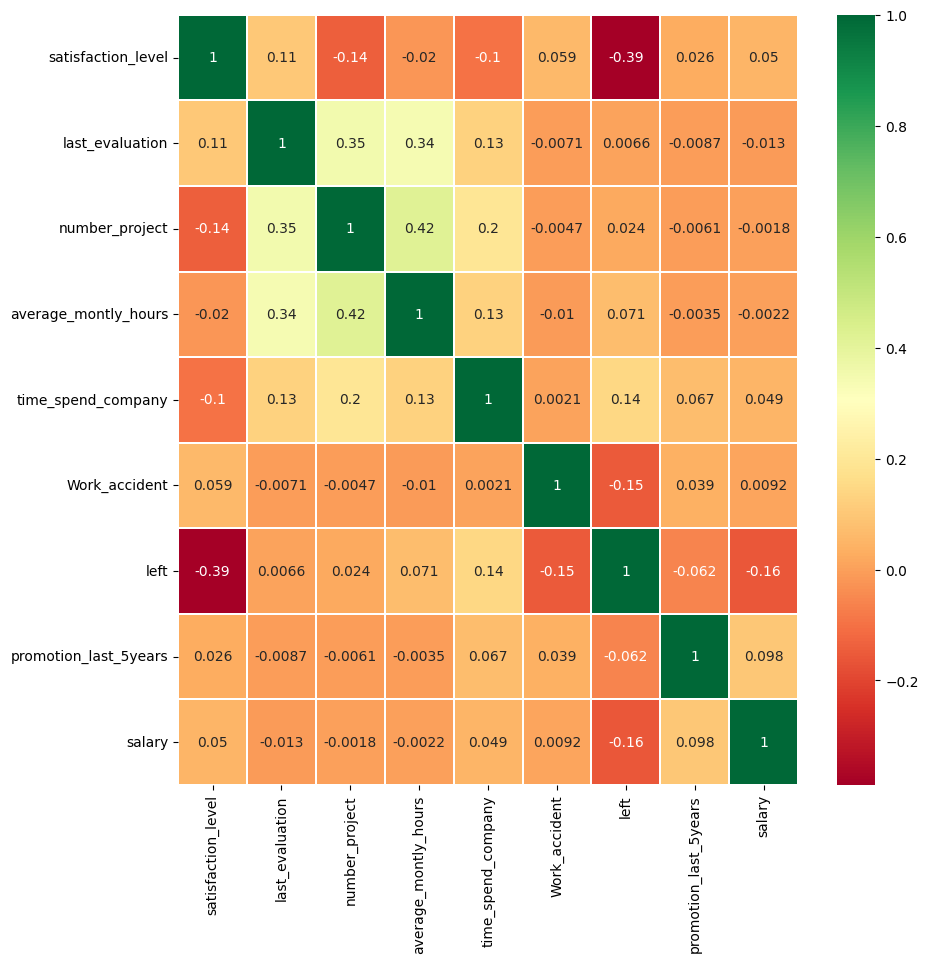

2 cамые скоррелированные переменные ('number_project', 'average_montly_hours')
2 наименее скоррелированные переменные ('satisfaction_level', 'left')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Расчет корреляционной матрицы для количественных переменных
correlation_matrix = numeric_df.corr()

# Визуализация корреляционной матрицы
sns.heatmap(correlation_matrix, annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

# Убираем корреляцию переменной с самой собой (значение 1.0)
np.fill_diagonal(correlation_matrix.values, 0)

# Самые скоррелированные переменные
most_correlated_vars = correlation_matrix.stack().idxmax()

# Наименее скоррелированные переменные
least_correlated_vars = correlation_matrix.stack().idxmin()

print('2 cамые скоррелированные переменные', most_correlated_vars)
print('2 наименее скоррелированные переменные', least_correlated_vars)



Рассчитайте сколько сотрудников работает в каждом
департаменте.
5

In [ ]:
# Теперь рассчитаем количество сотрудников в каждом департаменте
employees_per_department = df['department'].value_counts()
employees_per_department

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

Показать распределение сотрудников по зарплатам. 5

low       7316
medium    6446
high      1237
Name: salary, dtype: int64


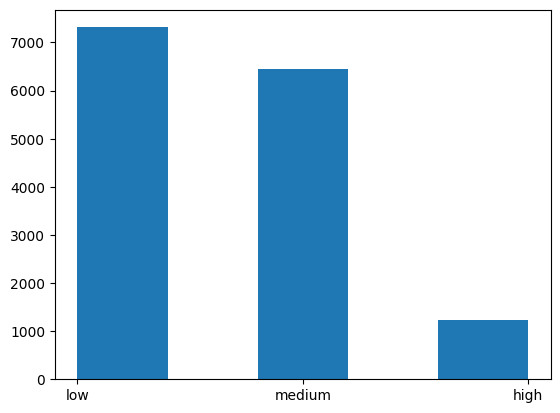

In [ ]:
#{'high':3 , 'medium':2 , 'low':1 }
salary_distribution = df_salary['salary'].value_counts()
print(salary_distribution)

plt.hist(df_salary['salary'], 5)
plt.show()

Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности
5

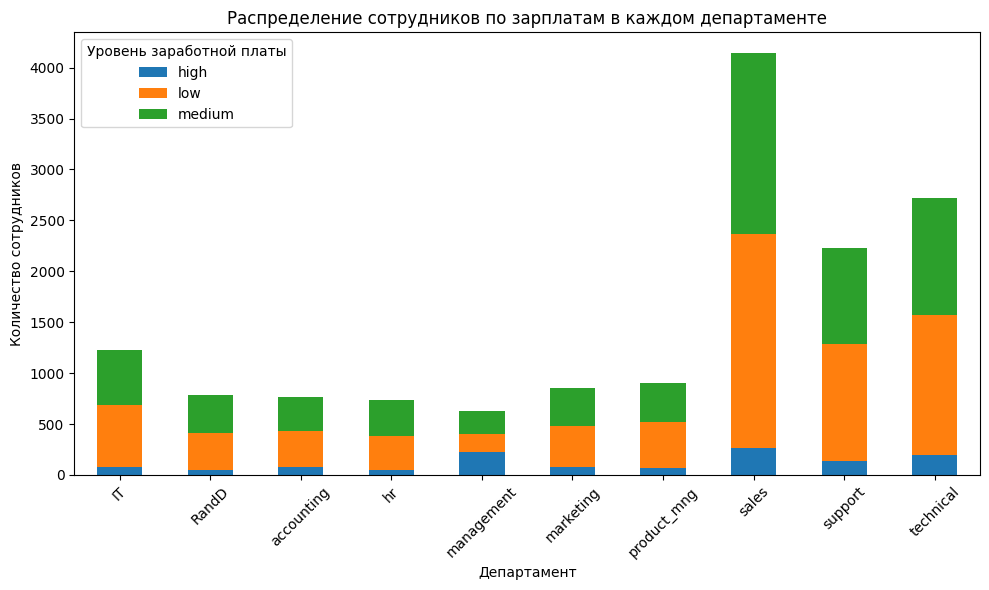

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


In [ ]:
# Распределение сотрудников по зарплатам в каждом департаменте
salary_distribution = df_salary.groupby('department')['salary'].value_counts().unstack(fill_value=0)

ax = salary_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Распределение сотрудников по зарплатам в каждом департаменте')
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')
plt.xticks(rotation=45)
plt.legend(title='Уровень заработной платы')
plt.tight_layout()
plt.show()

salary_distribution


Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом
10

In [ ]:
from scipy.stats import ttest_ind

# Фильтрация сотрудников по уровню зарплаты
high_salary = df_salary[df_salary['salary'] == 'high']['average_montly_hours']
low_salary = df_salary[df_salary['salary'] == 'low']['average_montly_hours']

# Проведение t-теста для проверки гипотезы
t_stat, p_val = ttest_ind(high_salary, low_salary, equal_var=False, nan_policy='omit')

t_stat, p_val

(-0.7624331665385475, 0.4459045542257889)

**По результатам, не было найдено статистически значимых доказательств поддерживающих исходную гипотезу.**

Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

In [ ]:
# Расчет доли сотрудников с повышением за последние 5 лет
# для уволившихся сотрудников (left == 1) и работающих сотрудников (left == 0)
#promotion_last_5years представляет собой бинарный признак:
#1 для сотрудников, которые получили повышение за последние 5 лет,
#0 для тех, кто не получил, долю считаем через mean()
promotion_rate_left = df[df['left'] == 1]['promotion_last_5years'].mean()
promotion_rate_stayed = df[df['left'] == 0]['promotion_last_5years'].mean()

# Расчет средней степени удовлетворенности для обеих групп
avg_satisfaction_left = df[df['left'] == 1]['satisfaction_level'].mean()
avg_satisfaction_stayed = df[df['left'] == 0]['satisfaction_level'].mean()

# Расчет среднего количества проектов для обеих групп
avg_projects_left = df[df['left'] == 1]['number_project'].mean()
avg_projects_stayed = df[df['left'] == 0]['number_project'].mean()

print("Доля сотрудников с повышением за последние 5 лет среди уволившихся: {:.2f}%".format(promotion_rate_left * 100))
print("Доля сотрудников с повышением за последние 5 лет среди не уволившихся: {:.2f}%".format(promotion_rate_stayed * 100))
print("Средняя степень удовлетворенности среди уволившихся: {:.2f}".format(avg_satisfaction_left))
print("Средняя степень удовлетворенности среди не уволившихся: {:.2f}".format(avg_satisfaction_stayed))
print("Среднее количество проектов среди уволившихся: {:.2f}".format(avg_projects_left))
print("Среднее количество проектов среди не уволившихся: {:.2f}".format(avg_projects_stayed))


Доля сотрудников с повышением за последние 5 лет среди уволившихся: 0.53%
Доля сотрудников с повышением за последние 5 лет среди не уволившихся: 2.63%
Средняя степень удовлетворенности среди уволившихся: 0.44
Средняя степень удовлетворенности среди не уволившихся: 0.67
Среднее количество проектов среди уволившихся: 3.86
Среднее количество проектов среди не уволившихся: 3.79


Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

Проверяем применимость модели LDA для нашего dataframe

1. Результаты теста Колмогорова-Смирнова:
satisfaction_level: Statistic: 0.07527, p-value: 2.3837e-74
last_evaluation: Statistic: 0.08748, p-value: 2.6125e-100
number_project: Statistic: 0.17221, p-value: 0
average_montly_hours: Statistic: 0.08442, p-value: 1.9625e-93
time_spend_company: Statistic: 0.27938, p-value: 0
Work_accident: Statistic: 0.51491, p-value: 0
left: Statistic: 0.47383, p-value: 0
promotion_last_5years: Statistic: 0.53733, p-value: 0

Результаты теста Левена для переменных:

Последняя оценка (last_evaluation):
   - Статистика Левена: 773.51, p-значение: 4.91e-166
Количество проектов (number_project):
   - Статистика Левена: 4620.64, p-значение: 0.00e+00
Время, проведённое в компании (time_spend_company):
   - Статистика Левена: 26.00, p-значение: 0.00
Наличие рабочего инцидента (Work_accident):
   - Статистика Левена: 367.33, p-значение: 6.61e-81
Повышение за последние 5 лет (promotion_last_5years):
   - Статистика Левена: 57.47, p-значение: 3.62e-14


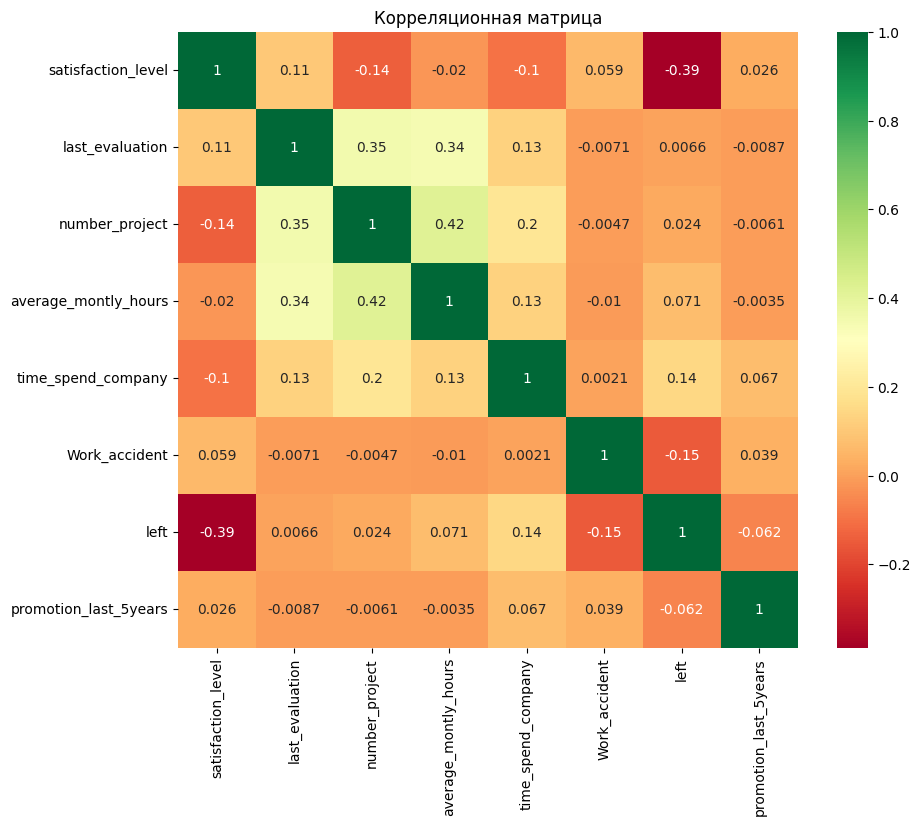

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, norm, levene

# Исключение столбцов 'department','salary'
hr_data_updated = df.drop(['department','salary'], axis=1)

#1. Проверка на нормальность распределения. Отступление обычно является не критичным
#Используем тест Колмагорова-Смирнова из-за большого df
ks_results = {column: kstest(hr_data_updated[column], 'norm', args=(hr_data_updated[column].mean(), hr_data_updated[column].std()))
              for column in hr_data_updated.columns if hr_data_updated[column].dtype != 'object'}
#Форматируем вывод
formatted_ks_results = {column: f"Statistic: {result.statistic:.5f}, p-value: {result.pvalue:.5g}"
                        for column, result in ks_results.items()}

print("1. Результаты теста Колмогорова-Смирнова:")
for variable, result in formatted_ks_results.items():
    print(f"{variable}: {result}")

#2. Проверка на однородность дисперсии/ковариации, малые отклонения не фатальны
levene_results_last_evaluation = levene(hr_data_updated[hr_data_updated['left'] == 0]['last_evaluation'],
                                        hr_data_updated[hr_data_updated['left'] == 1]['last_evaluation'])

levene_results_number_project = levene(hr_data_updated[hr_data_updated['left'] == 0]['number_project'],
                                       hr_data_updated[hr_data_updated['left'] == 1]['number_project'])

levene_results_time_spend_company = levene(hr_data_updated[hr_data_updated['left'] == 0]['time_spend_company'],
                                           hr_data_updated[hr_data_updated['left'] == 1]['time_spend_company'])

levene_results_work_accident = levene(hr_data_updated[hr_data_updated['left'] == 0]['Work_accident'],
                                      hr_data_updated[hr_data_updated['left'] == 1]['Work_accident'])

levene_results_promotion_last_5years = levene(hr_data_updated[hr_data_updated['left'] == 0]['promotion_last_5years'],
                                              hr_data_updated[hr_data_updated['left'] == 1]['promotion_last_5years'])

print(f"\nРезультаты теста Левена для переменных:\n")
print(f"Последняя оценка (last_evaluation):")
print(f"   - Статистика Левена: {levene_results_last_evaluation.statistic:.2f}, p-значение: {levene_results_last_evaluation.pvalue:.2e}")

print(f"Количество проектов (number_project):")
print(f"   - Статистика Левена: {levene_results_number_project.statistic:.2f}, p-значение: {levene_results_number_project.pvalue:.2e}")

print(f"Время, проведённое в компании (time_spend_company):")
print(f"   - Статистика Левена: {levene_results_time_spend_company.statistic:.2f}, p-значение: {levene_results_time_spend_company.pvalue:.2f}")

print(f"Наличие рабочего инцидента (Work_accident):")
print(f"   - Статистика Левена: {levene_results_work_accident.statistic:.2f}, p-значение: {levene_results_work_accident.pvalue:.2e}")

print(f"Повышение за последние 5 лет (promotion_last_5years):")
print(f"   - Статистика Левена: {levene_results_promotion_last_5years.statistic:.2f}, p-значение: {levene_results_promotion_last_5years.pvalue:.2e}")


#3. Проверка корреляции между признаками, данные должны быть разнообразными и независимыми друг от друга
correlation_matrix = hr_data_updated.corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title("Корреляционная матрица")
plt.show()


1. Все p-значения значительно меньше 0.05, что подтверждает, что распределения данных по этим переменным не соответствуют нормальному распределению. Однако LDA может быть устойчивым к некоторым нарушениям этого предположения, особенно при больших объемах данных.
2. Несоответствие предположения о однородности: Для большинства рассмотренных переменных (как 'last_evaluation', 'number_project', 'work_accident', 'promotion_last_5years') наблюдаются значительные различия в дисперсии между группами уволившихся и не уволившихся сотрудников. Это говорит о том, что предположение о однородности дисперсии нарушается для этих признаков.
LDA может оставаться действенным методом даже при некоторых нарушениях его предположений (особенно при больших объёмах данных).
3. В корреляционной матрице видны значимые корреляции (умеренного уровня), например между number_project и average_montly_hours (0.42), satisfaction_level и left (-0.39), а также между last_evaluation и average_montly_hours (0.34)

Несмотря на это, LDA может быть достаточно устойчивым в практических задачах даже при данных значения, дополнительно сделаем сравнение моделей LDA и модель логистической регрессии






In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Исключение столбцов 'department' и 'salary'
X = df.drop(['left', 'department', 'salary'], axis=1)
y = df['left']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение моделей LDA и логистической регрессии
lda = LinearDiscriminantAnalysis()
log_reg = LogisticRegression(max_iter=1000)
lda.fit(X_train, y_train)
log_reg.fit(X_train, y_train)

# Предсказания на тестовых данных
y_pred_lda = lda.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)

# Оценка моделей
accuracy_lda = accuracy_score(y_test, y_pred_lda)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
class_report_lda = classification_report(y_test, y_pred_lda)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)

# Вывод результатов
print("Точность LDA: ", accuracy_lda)
print("Отчёт о классификации для LDA:\n", class_report_lda)
print("Точность логистической регрессии: ", accuracy_log_reg)
print("Отчёт о классификации для логистической регрессии:\n", class_report_log_reg)


Точность LDA:  0.7557777777777778
Отчёт о классификации для LDA:
               precision    recall  f1-score   support

           0       0.80      0.92      0.85      3428
           1       0.48      0.25      0.32      1072

    accuracy                           0.76      4500
   macro avg       0.64      0.58      0.59      4500
weighted avg       0.72      0.76      0.73      4500

Точность логистической регрессии:  0.7595555555555555
Отчёт о классификации для логистической регрессии:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85      3428
           1       0.49      0.24      0.32      1072

    accuracy                           0.76      4500
   macro avg       0.64      0.58      0.59      4500
weighted avg       0.72      0.76      0.73      4500



**Результаты показывают, что обе модели имеют схожую производительность.  LDA может быть вполне подходящей моделью для этой задачи, несмотря на нарушение некоторых из её предположений.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Исключение столбцов 'department' и 'salary'
hr_data_updated = df.drop(['department', 'salary'], axis=1)

# Определение предикторов и целевой переменной
X = hr_data_updated.drop('left', axis=1)
y = hr_data_updated['left']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание и обучение модели LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = lda.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


report = f"""
Отчет анализа модели LDA с учетом зарплаты:

1. Точность (Accuracy): {accuracy:.2f}

2. Матрица ошибок (Confusion Matrix):
   - Истинно положительные (TP): {conf_matrix[0][0]}
   - Ложноположительные (FP): {conf_matrix[0][1]}
   - Ложноотрицательные (FN): {conf_matrix[1][0]}
   - Истинно отрицательные (TN): {conf_matrix[1][1]}

3. Отчет классификации:
{class_report}
"""

print(report)


Отчет анализа модели LDA с учетом зарплаты:

1. Точность (Accuracy): 0.76

2. Матрица ошибок (Confusion Matrix):
   - Истинно положительные (TP): 3138
   - Ложноположительные (FP): 290
   - Ложноотрицательные (FN): 809
   - Истинно отрицательные (TN): 263

3. Отчет классификации:
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      3428
           1       0.48      0.25      0.32      1072

    accuracy                           0.76      4500
   macro avg       0.64      0.58      0.59      4500
weighted avg       0.72      0.76      0.73      4500




Загрузить jupyter notebook с решение на github и прислать ссылку

In [ ]:
Загрузить jupyter notebook с решение на github и прислать ссылку

Зарегистрироваться